<a href="https://colab.research.google.com/github/practice-grounds-wpaarth24/Transfer_Learning-Image-/blob/main/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import urllib.request
url = "https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip"
filename = "10_food_classes_10_percent.zip"
urllib.request.urlretrieve(url, filename)

('10_food_classes_10_percent.zip', <http.client.HTTPMessage at 0x7c5d1616b790>)

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()

In [1]:
import os
import pathlib
import numpy as np

data_dir = pathlib.Path("10_food_classes_10_percent/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [2]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import pathlib

def view_random_image(target_dir):
  target_dir = pathlib.Path(target_dir)
  class_names = np.array(sorted([item.name for item in target_dir.glob('*')]))
  rand_index = random.randint(0, len(class_names)-1)
  folder = target_dir / class_names[rand_index]
  img_path = folder / random.choice(os.listdir(folder))
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.title(class_names[rand_index])
  plt.axis(False)
  plt.show()

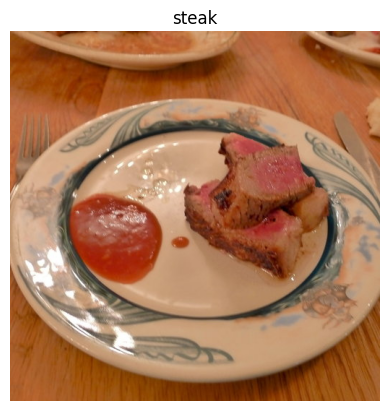

In [5]:
img = view_random_image("10_food_classes_10_percent/train")

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               batch_size=25,
                                               class_mode ='categorical'
                                               )
test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size = (224,224),
                                               batch_size=25,
                                               class_mode ='categorical'
                                               )

Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [8]:
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [9]:
IMG_SHAPE = (224,224) + (3,)

In [10]:
import tensorflow_hub as hub
import tensorflow as tf

hub_layer = hub.KerasLayer("https://kaggle.com/models/google/resnet-v2/TensorFlow2/50-feature-vector/1",
                   trainable=False)

hub_layer_wrapper = tf.keras.layers.Lambda(lambda x: hub_layer(x))

m = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(224, 224, 3)),
    hub_layer_wrapper,
    tf.keras.layers.Dense(10, activation='softmax')
])


C:\Users\Paarth\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [11]:
m.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [12]:
history = m.fit(train_data,
                epochs=5,
                validation_data=test_data,
                callbacks=[create_tensorboard_callback("training_logs", "resnet_v2_10_percent_data")]
                )

Saving TensorBoard log files to: training_logs/resnet_v2_10_percent_data/20240806-105757
Epoch 1/5


C:\Users\Paarth\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30/30 ━━━━━━━━━━━━━━━━━━━━ 180s 6s/step - accuracy: 0.2213 - loss: 2.3527 - val_accuracy: 0.6596 - val_loss: 1.0916
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 171s 6s/step - accuracy: 0.7531 - loss: 0.8963 - val_accuracy: 0.7400 - val_loss: 0.8300
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 169s 6s/step - accuracy: 0.8356 - loss: 0.5881 - val_accuracy: 0.7800 - val_loss: 0.7095
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 177s 6s/step - accuracy: 0.8788 - loss: 0.4813 - val_accuracy: 0.7860 - val_loss: 0.6694
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 168s 6s/step - accuracy: 0.9402 - loss: 0.3286 - val_accuracy: 0.7992 - val_loss: 0.6492


In [33]:
custom_test_images = "C:/Users/Paarth/Desktop/Custom_Images"
custom_test_images_list = os.listdir(custom_test_images)

In [34]:
def precprocess_image(filename):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, (224, 224))
  img = img/255.
  return img

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 922ms/step


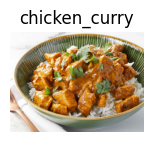

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


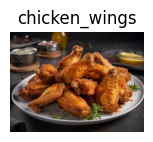

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


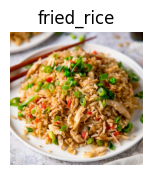

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


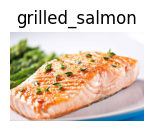

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


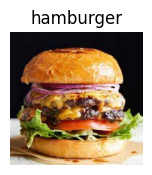

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


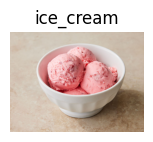

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


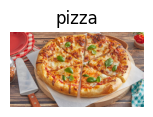

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


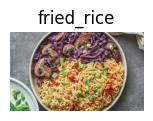

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


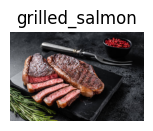

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


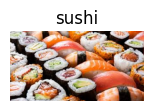

In [36]:
for i in range(1,11):
  filename = custom_test_images + "/" + str(i) + ".jpg"
  img = precprocess_image(filename)
  img = tf.expand_dims(img, axis=0)
  pred = m.predict(img)
  plt.figure(figsize=(10,10))
  plt.subplot(5,5,i)
  plt.imshow(mpimg.imread(filename))
  plt.title(class_names[np.argmax(pred)])
  plt.axis("off")
  plt.show()